In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv")
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

(891, 11)

In [ ]:
df.size

9801

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0
cabin,687


In [ ]:
df.nunique()

,0
survived,2
pclass,3
name,891
sex,2
age,88
sibsp,7
parch,7
ticket,681
fare,248
cabin,147


<Axes: xlabel='pclass', ylabel='count'>

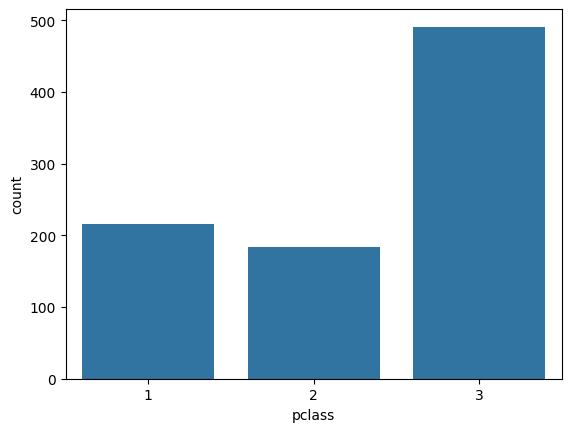

In [ ]:
sns.countplot(x = 'pclass',data= df)

In [ ]:
#get the exact count of syrvivedd and not survived
df.groupby('pclass').size( )

,0
pclass,
1,216
2,184
3,491


In [ ]:
df['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


In [ ]:
survived_m = np.sum((df['sex']=='male')&(df['survived']==1))
survived_m

109

In [ ]:
#count of survived males of age 30 or less
survived_ma = np.sum((df['sex']=='male')&(df['age']<=30)&(df['survived']==1))
survived_ma

52

In [ ]:
#count of survived males of age b/w 30 and 40
survived_ma = np.sum((df['sex']=='male')&(df['age'].between(30,40))&(df['survived']==1))
survived_ma

24

In [ ]:
#count of survived males of age b/w 40 and 70
survived_ma = np.sum((df['sex']=='male')&(df['age'].between(40,70))&(df['survived']==1))
survived_ma

18

In [ ]:
#count of survived males of age above 70
survived_ma = np.sum((df['sex']=='male')&(df['age']>=70)&(df['survived']==1))
survived_ma

1

<ipython-input-14-e9574f31b7d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

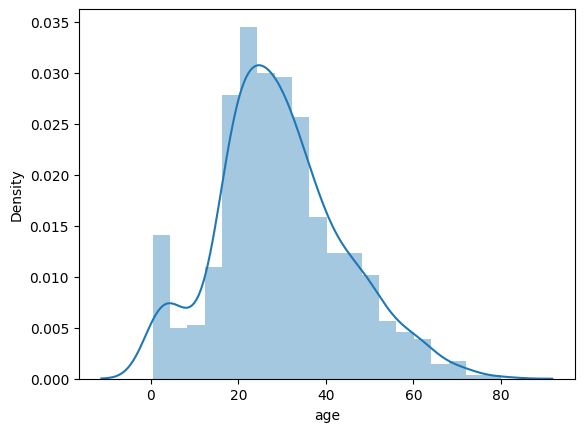

In [ ]:
#Distribution plot using seaborn
sns.distplot(df['age'])

Text(0, 0.5, 'count')

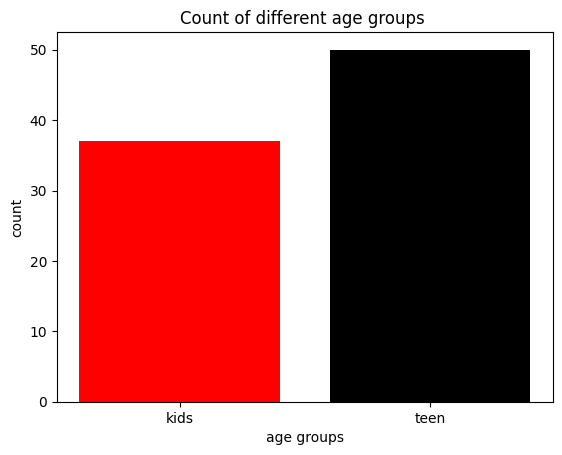

In [ ]:
#bar diagran with diff colors
age_grp = ['kids', 'teen']
c = ['r', 'black']
kids = np.sum((df['sex'] == 'male') & (df['age'] < 14))
teen = np.sum((df['sex'] == 'male') & (df['age'] > 14) & (df['age'] < 20))
#create an array of age groups
group = [kids, teen]
#plot bar graph
plt.bar(age_grp, group, color = c)
plt.title('Count of different age groups ')
plt.xlabel('age groups')
plt.ylabel('count')

<Axes: xlabel='age', ylabel='fare'>

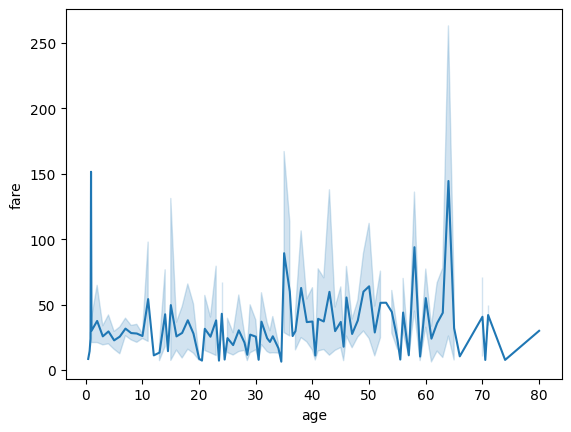

In [ ]:
#line plot
sns.lineplot(x ='age', y ='fare', data = df)

<Axes: xlabel='age', ylabel='fare'>

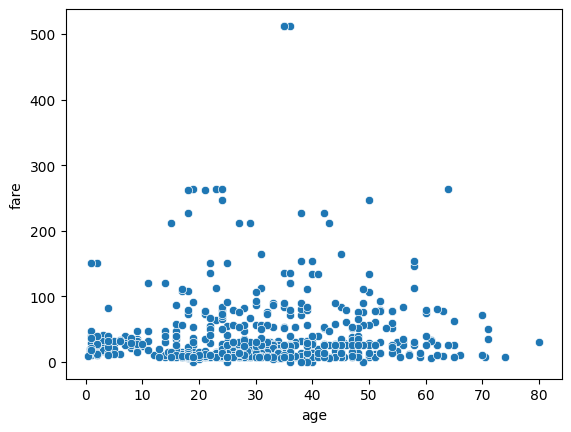

In [ ]:
sns.scatterplot(x ='age', y ='fare', data = df)

<Axes: >

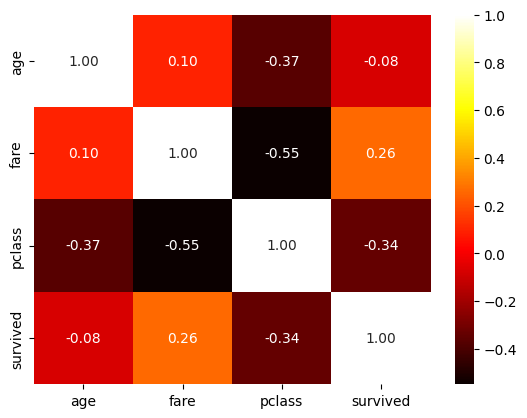

In [ ]:
#heatmap for correlation matrix
df1 = df[['age','fare','pclass','survived']]
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot =True, cmap ='hot', fmt ='.2f')

<Axes: xlabel='age', ylabel='Count'>

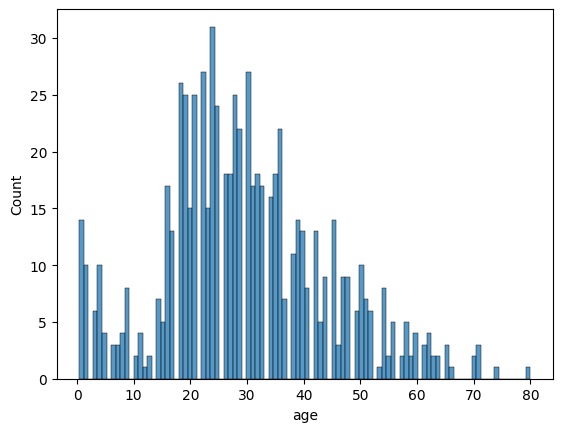

In [ ]:
#histogram
sns.histplot(df['age'].dropna(), bins =100  )

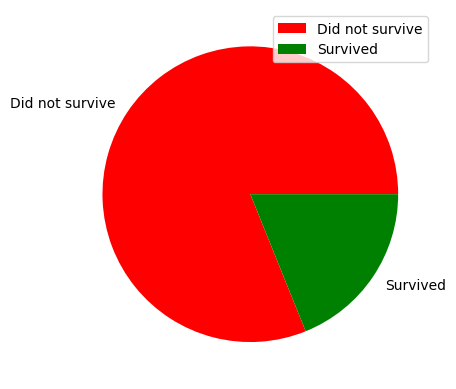

In [ ]:
#piechart
male_surv = df[df['sex'] =='male']
surviv_count = male_surv['survived'].value_counts()
labels = ['Did not survive','Survived']
colors = ['red','green']
plt.pie(surviv_count, labels = labels, colors = colors)
plt.legend()

<Axes: xlabel='pclass', ylabel='fare'>

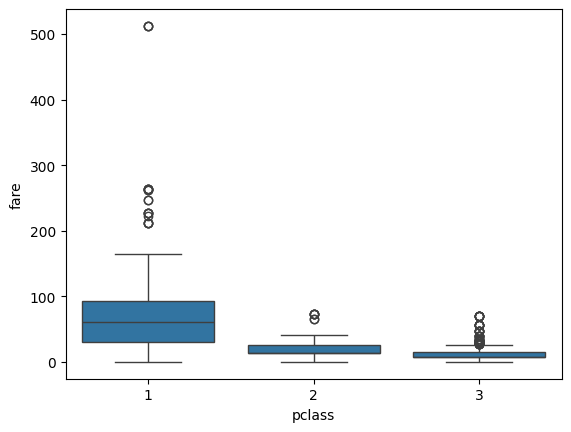

In [ ]:
#box plot
sns.boxplot(x ='pclass', y ='fare', data = df)

In [ ]:
df['age'].fillna(df['age'].mean(), inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


[45 17 47]
[91 70 72]


<BarContainer object of 3 artists>

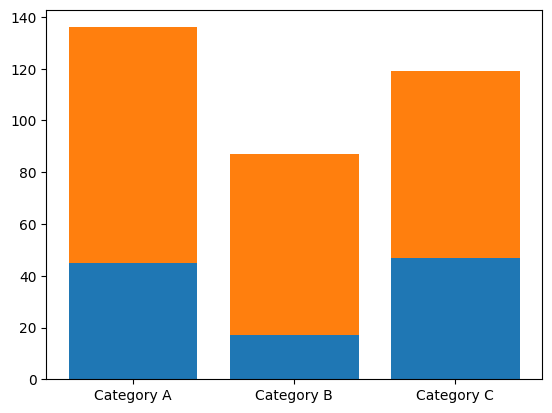

In [ ]:
'''Create a stacked bar chart showing the survival rates based on both gender and class. Each bar should represent a gender (male orfemale),
and within each bar, there should be stacked segments representing the survival rates for each class.'''
survived_mp1 = np.sum((df['sex']=='male')&(df['survived']==1)&(df['pclass']==1))
survived_fp1 = np.sum((df['sex']=='female')&(df['survived']==1)&(df['pclass']==1))
survived_mp2 = np.sum((df['sex']=='male')&(df['survived']==1)&(df['pclass']==2))
survived_fp2 = np.sum((df['sex']=='female')&(df['survived']==1)&(df['pclass']==2))
survived_mp3 = np.sum((df['sex']=='male')&(df['survived']==1)&(df['pclass']==3))
survived_fp3 = np.sum((df['sex']=='female')&(df['survived']==1)&(df['pclass']==3))
male = np.array([survived_mp1,survived_mp2,survived_mp3])
female = np.array([survived_fp1,survived_fp2,survived_fp3])
print(male)
print(female)
categories = ['Category A', 'Category B', 'Category C']
# Create stacked bar chart
plt.bar(categories, male, label='male')
plt.bar(categories, female, bottom=male, label='female')

Text(0, 0.5, 'count')

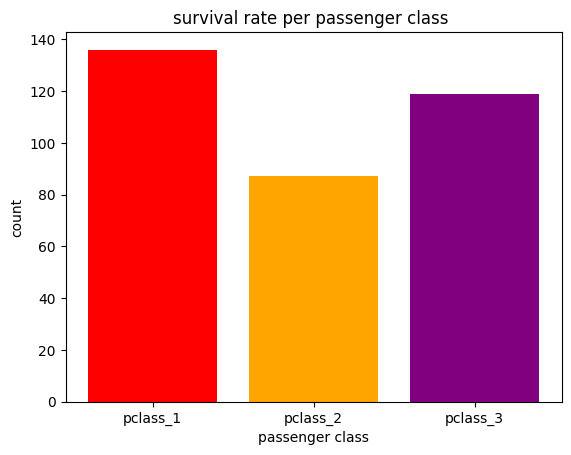

In [ ]:
#problem 1
pclass_grp = ['pclass_1','pclass_2','pclass_3']
c = ['r','orange','purple']
class_1 = np.sum((df['survived'] ==1) & (df['pclass'] ==1))
class_2 = np.sum((df['survived'] ==1) & (df['pclass'] ==2))
class_3 = np.sum((df['survived'] ==1) & (df['pclass'] ==3))
#create an array of age groups
group = [class_1, class_2, class_3]
#plot bar graph
plt.bar(pclass_grp, group, color = c)
plt.title('survival rate per passenger class ')
plt.xlabel('passenger class')
plt.ylabel('count')

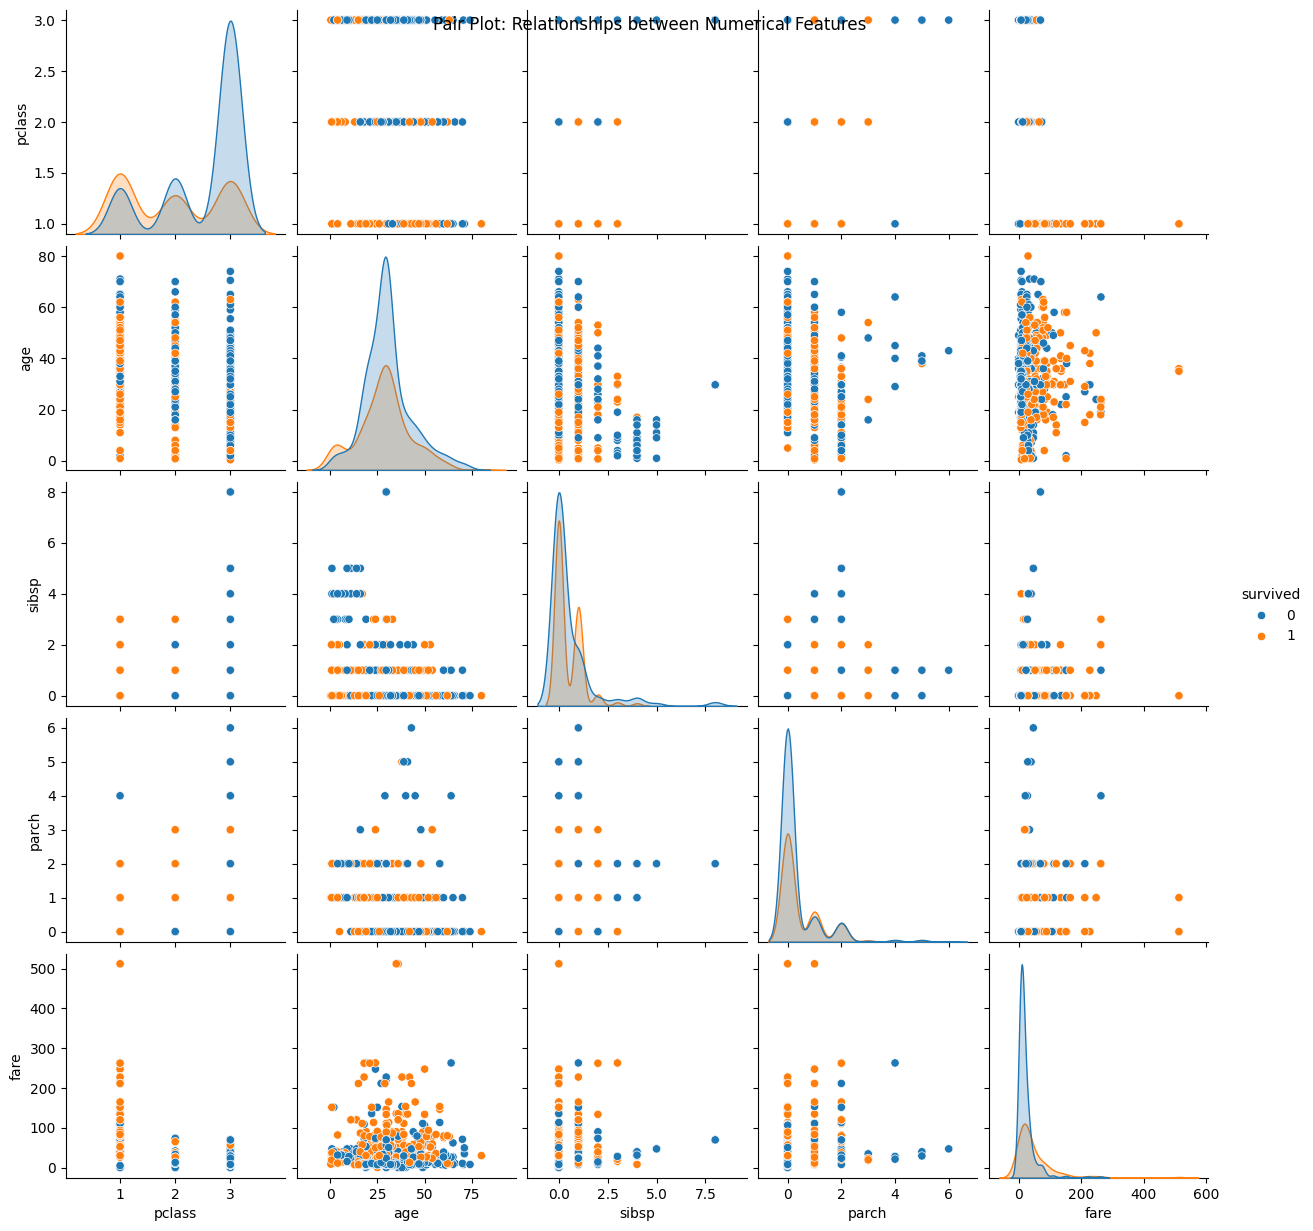

In [ ]:
# Pair plot - Visualizing relationships between numerical features
sns.pairplot(df[['survived','pclass','age','sibsp','parch','fare']].dropna(), hue='survived')
plt.suptitle('Pair Plot: Relationships between Numerical Features')
plt.show()